In [4]:
# Importing All Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [6]:
# Read the data set.
applications = pd.read_csv('application_data.csv') 
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
# describing the data
applications.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
# shape of the data
applications.shape

(307511, 122)

# Data Cleaning (Fix columns, Handle missing values, Handle outliers, Standardize values)

## Fixing coulmns 

In [9]:
applications.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [10]:
# Sum of null values
applications.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
# Percentage of null values
applications.isna().mean().round(5)*100

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
REGION_POPULATION_RELATIVE       0.000
DAYS_BIRTH                       0.000
DAYS_EMPLOYED                    0.000
DAYS_REGISTRATION                0.000
DAYS_ID_PUBLISH                  0.000
OWN_CAR_AGE                     65.991
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_CONT_MOBILE         

Some columns consists more than 40% of null values can be drop.
Certain columns like apartments area in a density region can give some insights to living condition of the individuals.
Although we can keep some apartments columns, rest can be drop.

In [16]:
dropped_columns = applications.loc[:, 'BASEMENTAREA_AVG':'EMERGENCYSTATE_MODE'].columns
applications.drop(dropped_columns, inplace=True, axis=1)
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

The Column Document flags doesn't have much relavent data as perpectives of our analysis. We can drop the column because this information is not enough to analyse that what these documents are.

# Handle missing values

In [17]:
# Find percentage of null values for each columns
applications.isna().mean().round(5)*100

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_TYPE_SUITE                 0.420
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
OWN_CAR_AGE                    65.991
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MOBILE                0.000
FLAG_PHONE  

Column - OCCUPATION_TYPE has 31% null values and can be impute with a occupation category'Others'

In [19]:
applications.OCCUPATION_TYPE.fillna('Others', inplace=True)
applications.OCCUPATION_TYPE.value_counts(normalize=True)*100

Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

The column 'EXT_SOURCE' have nulls(EXT_SOURCE_1-56.381%,EXT_SOURCE_2-0.215%,EXT_SOURCE_3-19.825%). These columns denoting scores given by external agencies and all appications doesn't have all the values filled in it. It will be meaningfull if we take mean of these three for analysis and can add a new column with average of the scores.

In [20]:
applications['EXT_SOURCE_AVG']= applications.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

In [21]:
applications['EXT_SOURCE_AVG']

0         0.161787
1         0.466757
2         0.642739
3         0.650442
4         0.322738
            ...   
307506    0.413601
307507    0.115992
307508    0.499536
307509    0.587593
307510    0.518984
Name: EXT_SOURCE_AVG, Length: 307511, dtype: float64

# Handle Outliers

In [22]:
applications.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307339.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.509251
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.149802
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
2

Analysing column 'AMT_INCOME_TOTAL' for Outliers

In [26]:
applications['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

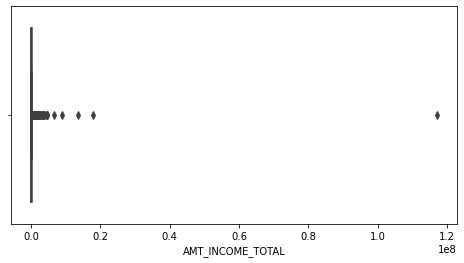

In [27]:
plt.figure(figsize=[8,4])
sns.boxplot(applications['AMT_INCOME_TOTAL'])
plt.show()

In [30]:
# Analysing Quantiles like(50%,75%,90% and so on)
applications.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.90,00.95,00.99,0.999,0.9999])

0.5000     147150.0
0.7000     180000.0
0.9000     270000.0
0.9500     337500.0
0.9900     472500.0
0.9990     900000.0
0.9999    2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [32]:
# values lying outside 0.9999 quantile which is outlier.
applications[applications.AMT_INCOME_TOTAL>0.2*10**8]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.239838


Outliers in column 'AMT_INCOME_TOTAL' are continuous except one and we can retain them.

One variable s.no(12840) have one single value which is too high and the loan applied is a normal amount, so it can be drop.


In [35]:
applications = applications[~(applications.AMT_INCOME_TOTAL > 0.2*10**8)]
applications.shape

(307510, 77)

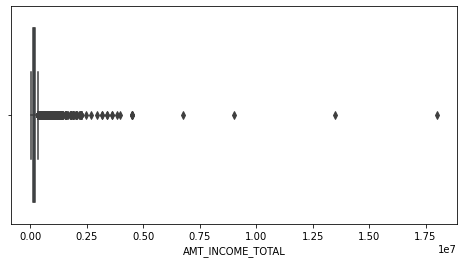

In [38]:
# Plot 'AMT_INCOME_TOTAL' again to check
plt.figure(figsize=[8,4])
sns.boxplot(applications['AMT_INCOME_TOTAL'])
plt.show()

There are more outliers in the columns 'AMT_INCOME_TOTAL', but these values are meaningful as it is spread more or less evenly. So, we can remain as it is.

#### Analyse column 'AMT_CREDIT' for outliers

In [39]:
applications['AMT_CREDIT'].describe()

count    3.075100e+05
mean     5.990261e+05
std      4.024914e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

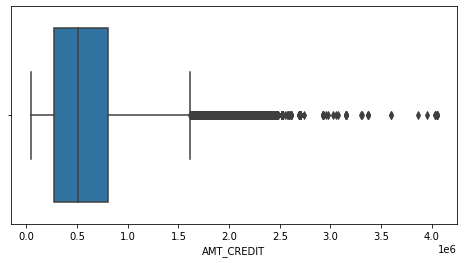

In [45]:
plt.figure(figsize=[8,4])
sns.boxplot(applications['AMT_CREDIT'])
plt.show()

In [47]:
applications['AMT_CREDIT'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [48]:
# In rows, values lying outside 0.99%.(more than 1854000)
applications[applications['AMT_CREDIT']>1854000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-11177,-1514,-64.0,-2793,NaN,1,1,0,1,0,1,Core staff,3.0,1,1,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.380092,0.693358,NaN,0.4753,0.0,0.0,0.0,0.0,-926.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.536725
337,100389,0,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,-14216,-365,-3183.0,-4423,13.0,1,1,1,1,0,0,Core staff,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,0.558582,0.748204,0.739412,0.2227,0.0,0.0,0.0,0.0,-2421.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.682066
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,-14966,-6158,-954.0,-4979,6.0,1,1,0,1,1,0,Core staff,4.0,2,2,FRIDAY,13,0,0,0,0,0,0,Police,NaN,0.682320,0.692559,0.1763,0.0,0.0,0.0,0.0,-1014.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.687440
441,100508,0,Cash loans,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,-18268,-2569,-4292.0,-1699,1.0,1,1,0,1,1,1,Managers,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Trade: type 3,0.746108,0.774368,0.344155,0.1814,0.0,0.0,0.0,0.0,-523.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,4.0,1.0,0.621544
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,-20589,-13994,-5893.0,-4106,7.0,1,1,0,1,0,0,Core staff,2.0,2,2,MONDAY,16,0,0,0,0,0,0,Security Ministries,NaN,0.503266,NaN,0.1485,1.0,0.0,1.0,0.0,-2675.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.503266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,1755000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.072508,-19981,-3665,-5642.0,-3402,NaN,1,1,0,1,0,0,Medicine staff,2.0,1,1,TUESDAY,13,0,0,0,0,0,0,Medicine,NaN,0.747726,0.624615,0.3175,1.0,0.0,1.0,0.0,-1866.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0,0.686170
307095,45578

In the column 'AMT_GOODS_PRICE' have relatively higher credits and by observing many of them good rpice also close to credit. We can kept like that as it is.

#### Analysing the column 'AMT_GOODS_PRICE' column for outliers

In [49]:
applications['AMT_GOODS_PRICE'].describe()

count    3.072320e+05
mean     5.383965e+05
std      3.694470e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

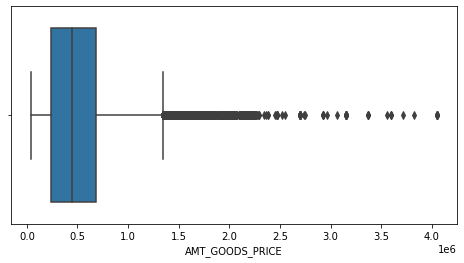

In [50]:
plt.figure(figsize=[8,4])
sns.boxplot(applications['AMT_GOODS_PRICE'])
plt.show()

It seems very close to the credit distribution which is rela life scenario and hence can be left as it is.

#### Analysing column 'DAYS_BIRTH' for outliers

In [54]:
applications['DAYS_BIRTH'].describe()

count    307510.000000
mean     -16037.006195
std        4363.991364
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In this column values are filled in the form of a number format and the data isn't in the readable format. 
By converting this values, we can store this data in the new column.

In [55]:
applications['AGE'] = np.ceil(applications['DAYS_BIRTH']/-365) # New column - 'AGE'

In [56]:
applications['AGE'].describe() # Min age - 21 and Max age - 70

count    307510.000000
mean         44.433121
std          11.954500
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

# Standardize Values

Columns like 'DAYS_EMPLOYED' is in days, we need to convert it in years as already did for 'AGE'. 

In [58]:
applications['EXPERIENCE'] = np.round(applications['DAYS_EMPLOYED']/-365,1)
applications['EXPERIENCE']

0            1.7
1            3.3
2            0.6
3            8.3
4            8.3
           ...  
307506       0.6
307507   -1000.7
307508      21.7
307509      13.1
307510       3.5
Name: EXPERIENCE, Length: 307510, dtype: float64

In [60]:
# (-)ve Values in EXPERIENCE
applications[applications['EXPERIENCE']<0]['EXPERIENCE'].value_counts()

-1000.7    55374
Name: EXPERIENCE, dtype: int64

from above code, we can see that all 55374 values are same can be standardized by considering it as NaN.

#### Analysing column 'NAME_FAMILY_STATUS'.
To verify that column consist any unknown/null values or same values.

In [61]:
applications['NAME_FAMILY_STATUS'].value_counts()

Married                 196431
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

From above data we can say that 'marriage' and 'civil marriage' are same columns, can be merged into a single column. Single/Not married' can be convert to single. 
Data consists the 2 unknown values in it, can be drop.

In [64]:
# Coverting value names.
applications.NAME_FAMILY_STATUS.replace({'Civil marriage':'Married','Single / not married':'Single'}, inplace=True)

In [65]:
# Dropping the unknown values
applications = applications[~(applications['NAME_FAMILY_STATUS']=='Unknown')]
applications[(applications['NAME_FAMILY_STATUS']=='Unknown')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,EXPERIENCE


#### Analyze column 'CODE_GENDER'

In [66]:
applications['CODE_GENDER'].value_counts(normalize=True)*100

F      65.834385
M      34.164314
XNA     0.001301
Name: CODE_GENDER, dtype: float64

#### Analyze columns 'NAME_CONTRACT_TYPE' for loans.

In [67]:
applications['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278231
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64

#### Adding column 'Credit_Bureau_Total'to put the combining of total credits to each individuals.

In [71]:
applications['Credit_Bureau_Total'] = applications.iloc[:,-9:-3].sum(axis=1)
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,EXPERIENCE,Credit_Bureau_Total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0,1.7,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0,0.6,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,53.0,8.3,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,55.0,8.3,0.0


# Read 'Previous Applications' CSV file


From this data, we can find the previous applications to know about the applicant got approved successfully or got rejected and reason behind that approval or rejection. If successful, is the loan over or not?, is there any due or not?
This data could be more useful to us by applying EDA and merging to current data(i.e applications.csv)

In [74]:
previous_applications = pd.read_csv('previous_application.csv')
previous_applications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
previous_applications.shape

(1670214, 37)

In [77]:
previous_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [79]:
previous_applications.isna().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [80]:
previous_applications['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [81]:
previous_applications['FLAG_LAST_APPL_PER_CONTRACT'].value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

##### Keeping only the last application of all previous applications and dropping rest of the entries in the column 'FLAG_LAST_APPL_PER_CONTRACT'

In [82]:
previous_applications[previous_applications['FLAG_LAST_APPL_PER_CONTRACT'] == 'Y']
previous_applications['FLAG_LAST_APPL_PER_CONTRACT'].value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [83]:
previous_applications['NFLAG_LAST_APPL_IN_DAY'].value_counts(normalize=True)

1    0.996468
0    0.003532
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

Sorting previous application based on application id and dropping duplicates

In [86]:
previous_applications = previous_applications.sort_values('SK_ID_PREV', ascending=False).drop_duplicates('SK_ID_CURR')

In [87]:
previous_applications[previous_applications['DAYS_TERMINATION']>0].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
888701,2843497,451578,Cash loans,9175.185,132482.97,149969.97,NaN,132482.97,WEDNESDAY,11,Y,0,NaN,NaN,NaN,XNA,Approved,-618,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash Street: middle,365243.0,-588.0,102.0,365243.0,365243.0,1.0
1345642,2843496,425374,Revolving loans,31500.000,630000.00,630000.00,NaN,630000.00,THURSDAY,15,Y,1,NaN,NaN,NaN,XAP,Approved,-465,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,-454.0,-423.0,365243.0,365243.0,365243.0,0.0
298226,2843493,337804,Revolving loans,2250.000,45000.00,45000.00,NaN,45000.00,THURSDAY,17,Y,1,NaN,NaN,NaN,XAP,Approved,-459,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,-438.0,-410.0,365243.0,365243.0,365243.0,0.0
1489940,2843491,107385,Cash loans,25421.985,841500.00,963684.00,NaN,841500.00,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-304,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,60.0,low_action,Cash X-Sell: low,365243.0,-274.0,1496.0,365243.0,365243.0,1.0
728908,2843487,424008,Consumer loans,7179.795,78402.87,78399.00,3.87,78402.87,FRIDAY,15,Y,1,0.000054,NaN,NaN,XAP,Approved,-264,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Country-wide,150,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-233.0,97.0,365243.0,365243.0,0.0


In [88]:
previous_applications.shape

(338857, 37)

##### The column of interests are
'SK_ID_CURR',
'AMT_CREDIT',
'NAME_CONTRACT_STATUS',
'CODE_REJECT_REASON',
'NAME_YIELD_GROUP' and 'DAYS_TERMINATION'.

 Keeping the columns of interests and dropping rest columns to get better insight.

In [92]:
previous_applications_1 = previous_applications[['SK_ID_CURR','AMT_CREDIT','NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_YIELD_GROUP','DAYS_TERMINATION']]

In [93]:
previous_applications_1.head()

,SK_ID_CURR,AMT_CREDIT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
205485,406596,30912.75,Unused offer,CLIENT,XNA,NaN
717142,140761,41499.00,Unused offer,CLIENT,XNA,NaN
886179,237546,60673.50,Refused,LIMIT,middle,NaN
359118,100125,59503.50,Refused,SCO,middle,NaN
70058,250234,108180.00,Refused,SCO,low_action,NaN


Rename the column names into meaning contect of current application

In [96]:
renames = {'AMT_CREDIT':'PREV_AMT_CREDIT','NAME_CONTRACT_STATUS':'PREV_CONTRACT_STATUS','DAYS_TERMINATION':'PREV_DAYS_TERMINATION','CODE_REJECT_REASON':'PREV_REJECT_REASON','NAME_YIELD_GROUP':'PREV_YIELD_GROUP'}

previous_applications_1 = previous_applications_1.rename(columns=renames)
previous_applications_1.head()

,SK_ID_CURR,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
205485,406596,30912.75,Unused offer,CLIENT,XNA,NaN
717142,140761,41499.00,Unused offer,CLIENT,XNA,NaN
886179,237546,60673.50,Refused,LIMIT,middle,NaN
359118,100125,59503.50,Refused,SCO,middle,NaN
70058,250234,108180.00,Refused,SCO,low_action,NaN


#### Fixing anomalies in coulmn 'PREV_DAYS_TERMINATION'.

In [97]:
previous_applications_1['PREV_DAYS_TERMINATION'].value_counts(normalize=True)

 365243.0    0.232769
-9.0         0.000909
-15.0        0.000909
-144.0       0.000905
-17.0        0.000901
               ...   
-2774.0      0.000004
-2709.0      0.000004
-2777.0      0.000004
-2783.0      0.000004
-2733.0      0.000004
Name: PREV_DAYS_TERMINATION, Length: 2785, dtype: float64

In [99]:
previous_applications_1.PREV_DAYS_TERMINATION[previous_applications_1.PREV_DAYS_TERMINATION >0].value_counts()  # value 365243.0 seems impossible value, we'll replace it by NaN.

365243.0    56079
Name: PREV_DAYS_TERMINATION, dtype: int64

In [100]:
# Replacing value by NaN
previous_applications_1.PREV_DAYS_TERMINATION.replace({365243.0:np.NaN}, inplace=True)
previous_applications_1.PREV_DAYS_TERMINATION[previous_applications_1.PREV_DAYS_TERMINATION >0].value_counts()

Series([], Name: PREV_DAYS_TERMINATION, dtype: int64)

# Merge both the datasets ('Previous applications' and 'Current applications')
### Using joins -: 
####              1. left join
####              2. right join
####              3. left_on
####              4. right_on

In [103]:
applications = pd.merge(left=applications, right=previous_applications_1, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,EXPERIENCE,Credit_Bureau_Total,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0,1.7,1.0,179055.0,Approved,XAP,low_normal,-17.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0,348637.5,Approved,XAP,middle,-639.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0,0.6,0.0,20106.0,Approved,XAP,middle,-714.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,53.0,8.3,0.0,0.0,Canceled,XAP,XNA,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,55.0,8.3,0.0,284400.0,Approved,XAP,middle,NaN


In [104]:
applications['PREV_CONTRACT_STATUS'].isna().mean()

0.05350104712722921

In [105]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307507
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307496 non-null  float64
 10  AMT_GOODS_PRICE              307232 non-null  float64
 11  NAME_TYPE_SUITE              306218 non-null  object 
 12  NAME_INCOME_TYPE             307508 non-null  object 
 13 

# Univariate Analysis

#### Analyzing Target variable

In [107]:
applications['TARGET'].value_counts(normalize=True)

0    0.919274
1    0.080726
Name: TARGET, dtype: float64

In [109]:
# Adding new column from column 'TARGET'
applications['TARGET_CAT']=applications['TARGET'].apply(lambda x: 'defaulter' if x==1 else 'non-defaulter')
applications['TARGET_CAT'].value_counts(normalize=True)*100

non-defaulter    91.927364
defaulter         8.072636
Name: TARGET_CAT, dtype: float64

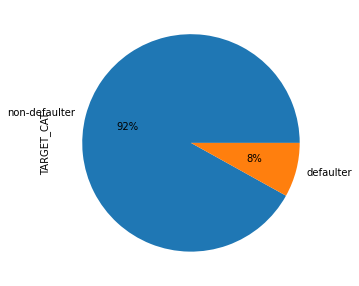

In [129]:
plt.figure(figsize=(5,5))
applications['TARGET_CAT'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show()

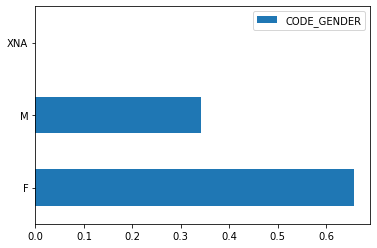

In [132]:
# gerder distribution in data
applications['CODE_GENDER'].value_counts(normalize=True).plot.barh()
plt.legend()
plt.show()

#### Education Type

In [133]:

applications['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218390
Higher education                  74862
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

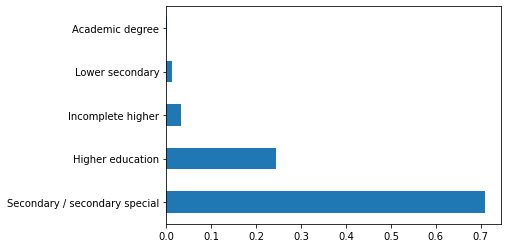

In [137]:
applications['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

#### Family Status

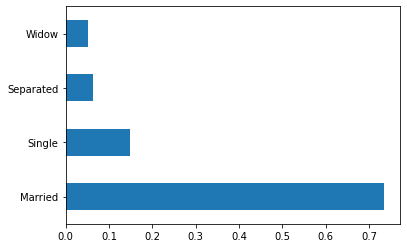

In [141]:
applications['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.barh()
plt.show()

#### Occupation Type

<AxesSubplot:>

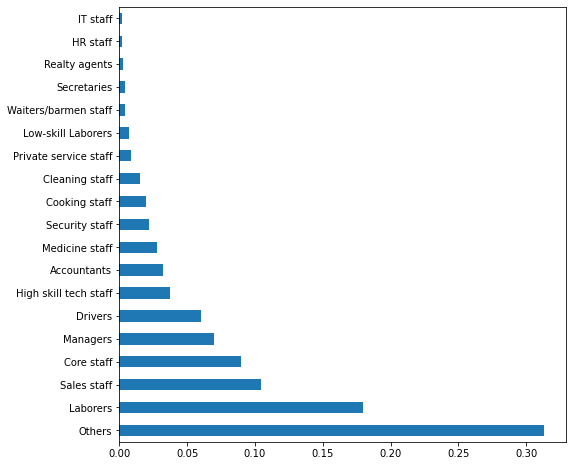

In [148]:
plt.figure(figsize=[8,8])
applications['OCCUPATION_TYPE'].value_counts(normalize=True).plot.barh()

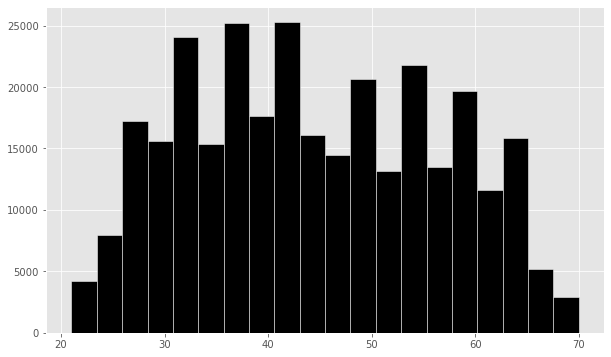

In [160]:
plt.style.use('ggplot')
plt.figure(figsize=[10,6])
plt.hist(applications['AGE'], bins=20, color='black', edgecolor='white')
plt.show()

In [162]:
# AGE Groups 
age_buckets = ['<30','30-40','40-50','50-60','60+']
applications['AGE_GROUP']= pd.cut(applications.AGE, [0,30,40,50,60,999], labels=age_buckets)
applications['AGE_GROUP'].value_counts(normalize=True)*100

30-40    26.765157
40-50    24.890735
50-60    22.133408
<30      14.640595
60+      11.570105
Name: AGE_GROUP, dtype: float64

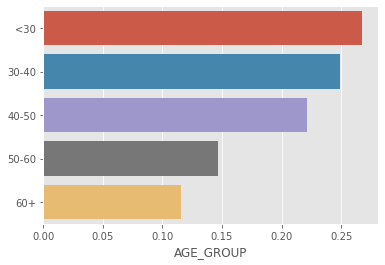

In [163]:
sns.barplot(applications['AGE_GROUP'].value_counts(normalize=True), age_buckets)
plt.show()

#### Previous applications status

In [164]:
applications['PREV_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        73.472459
Canceled        13.325614
Refused         11.637623
Unused offer     1.564304
Name: PREV_CONTRACT_STATUS, dtype: float64

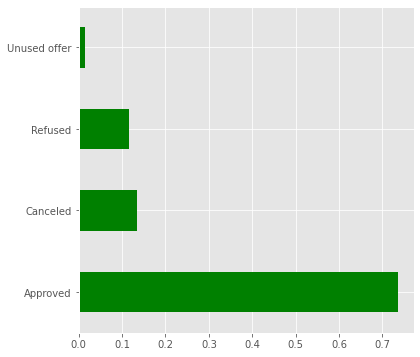

In [174]:
plt.figure(figsize=[6,6])
applications['PREV_CONTRACT_STATUS'].value_counts(normalize=True).plot.barh(color='green')
plt.show()

#### AMT_INCOME_TOTAL

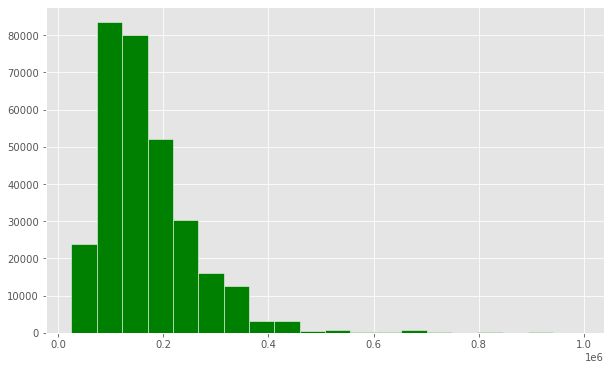

In [175]:
plt.figure(figsize=[10,6])
plt.hist(applications[applications['AMT_INCOME_TOTAL']<10**6].AMT_INCOME_TOTAL, bins=20, color='green', edgecolor='white')
plt.show()

#### AMT_CREDIT

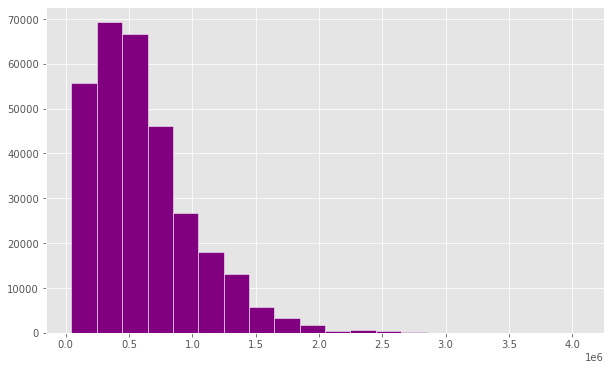

In [177]:
plt.figure(figsize=[10,6])
plt.hist(applications['AMT_CREDIT'], bins=20, color='purple',edgecolor='white')
plt.show()

#### EXT_SOURCE_AVG

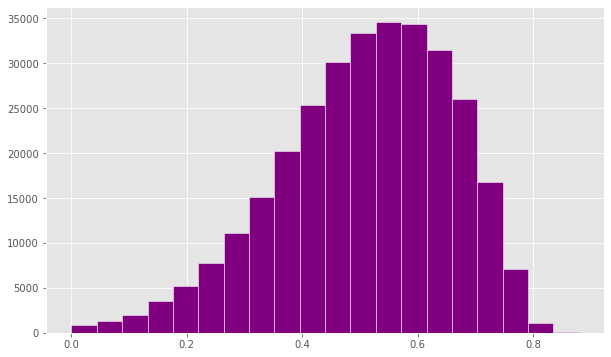

In [179]:
plt.figure(figsize=[10,6])
plt.hist(applications['EXT_SOURCE_AVG'], bins=20, color='Purple',edgecolor='white')
plt.show()

#### FLAG_OWN_REALTY (Individual/owns Property)

In [180]:
applications.FLAG_OWN_REALTY.value_counts(normalize=True)*100

Y    69.366976
N    30.633024
Name: FLAG_OWN_REALTY, dtype: float64

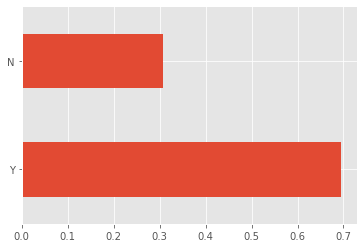

In [184]:
applications['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.barh()
plt.show()

# Bivariate Analysis

## Numerical - Categorical

#### Education level vs Income.

In [187]:
applications.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean','median'])

,mean,median
NAME_EDUCATION_TYPE,,
Academic degree,240009.146341,211500.0
Higher education,208652.135993,180000.0
Incomplete higher,181563.812397,157500.0
Lower secondary,129995.499869,112500.0
Secondary / secondary special,154623.483787,135000.0


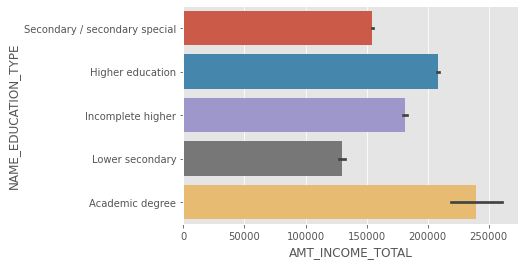

In [188]:
sns.barplot(applications['AMT_INCOME_TOTAL'], applications['NAME_EDUCATION_TYPE'])
plt.show()

#### Marital status vs Amount requested for loan

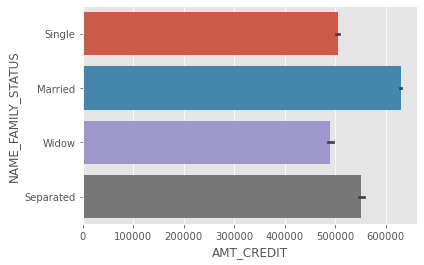

In [189]:
sns.barplot(applications['AMT_CREDIT'],applications['NAME_FAMILY_STATUS'])
plt.show()

#### Occuoation type vs Total Income

In [190]:
applications.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean','median'])

,mean,median
OCCUPATION_TYPE,,
Accountants,194577.550499,178218.0
Cleaning staff,130790.895551,112500.0
Cooking staff,138396.508176,126000.0
Core staff,172656.695254,157500.0
Drivers,187011.606413,180000.0
HR staff,188916.282416,158400.0
High skill tech staff,182842.045683,157500.0
IT staff,213465.601711,180000.0
Laborers,164240.355724,157500.0


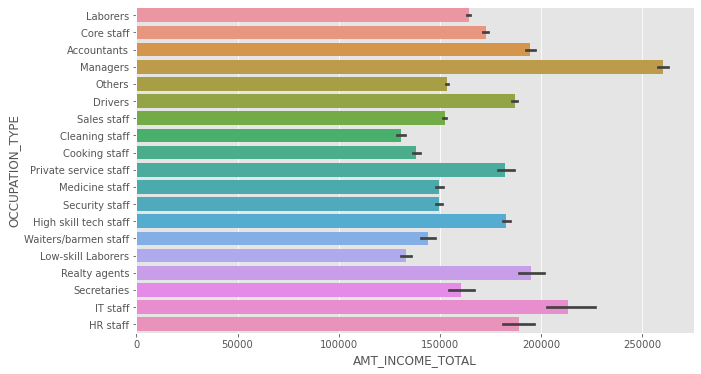

In [193]:
plt.figure(figsize=[10,6])
sns.barplot(applications['AMT_INCOME_TOTAL'],applications['OCCUPATION_TYPE'])
plt.show()

#### Total no of Credits Searches vs Status of previous Loan Application

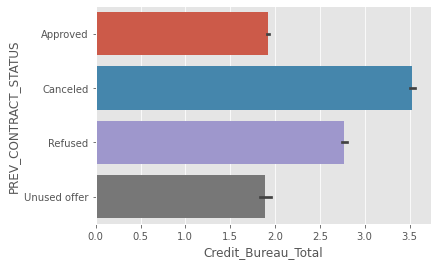

In [194]:
sns.barplot(applications['Credit_Bureau_Total'], applications['PREV_CONTRACT_STATUS'])
plt.show()

#### Income Amount vs Target

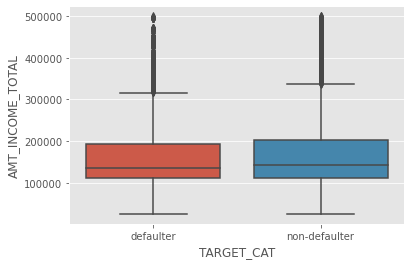

In [197]:
sns.boxplot(x=applications['TARGET_CAT'], y=applications[applications.AMT_INCOME_TOTAL < 0.5*10**6].AMT_INCOME_TOTAL)
plt.show()

#### Ext Source Score vs Target

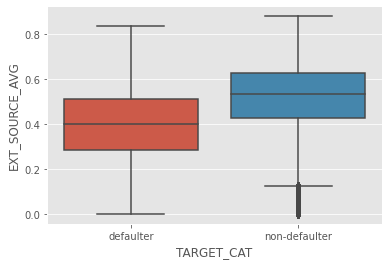

In [200]:
sns.boxplot(x=applications['TARGET_CAT'], y=applications.EXT_SOURCE_AVG)
plt.show()

#### Amount of loan vs Target

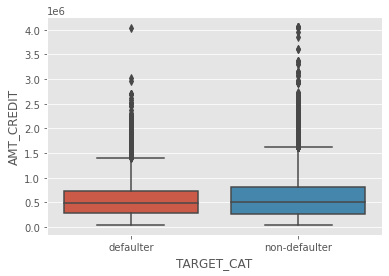

In [201]:
sns.boxplot(x=applications['TARGET_CAT'], y=applications.AMT_CREDIT)
plt.show()

#### Family member count vs Target

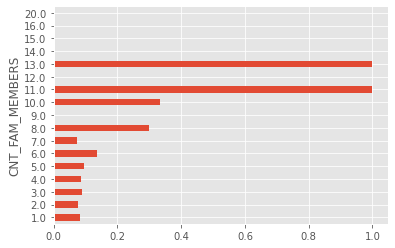

In [203]:
applications.groupby('CNT_FAM_MEMBERS').TARGET.mean().plot.barh()
plt.show()

#### Age Group vs Target

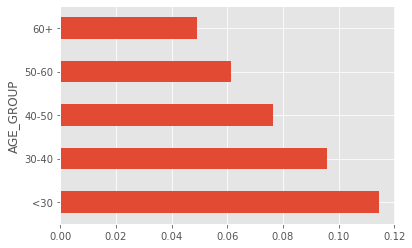

In [202]:
applications.groupby('AGE_GROUP').TARGET.mean().plot.barh()
plt.show()

## Categorical - Categorical

#### Education Type vs Target

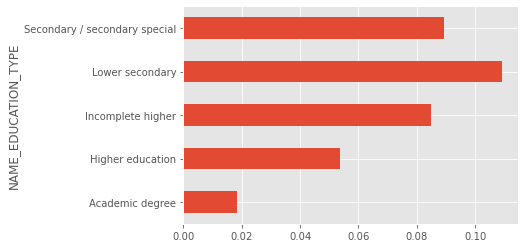

In [206]:
applications.groupby('NAME_EDUCATION_TYPE').TARGET.mean().plot.barh()
plt.show()

#### Occupation type vs Target

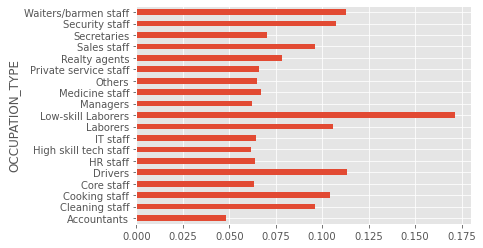

In [207]:
applications.groupby('OCCUPATION_TYPE').TARGET.mean().plot.barh()
plt.show()

#### Family Status vs Target

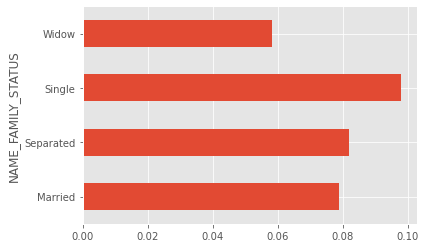

In [208]:
applications.groupby('NAME_FAMILY_STATUS').TARGET.mean().plot.barh()
plt.show()

#### Previous rejection reason vs Target

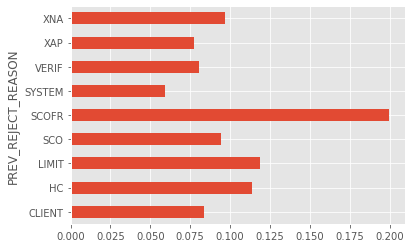

In [209]:
applications.groupby('PREV_REJECT_REASON').TARGET.mean().plot.barh()
plt.show()

#### Previous contract status vs Target

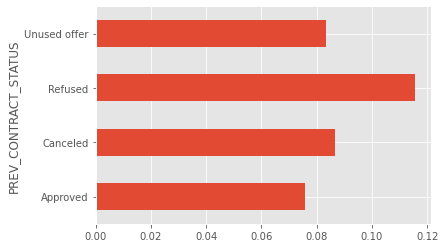

In [210]:
applications.groupby('PREV_CONTRACT_STATUS').TARGET.mean().plot.barh()
plt.show()

## Numerical - Numerical

#### Age vs Requested loan amount

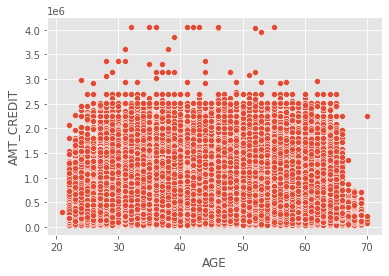

In [215]:
sns.scatterplot(applications['AGE'], applications['AMT_CREDIT'])
plt.show()

#### Total Income vs Experience in years

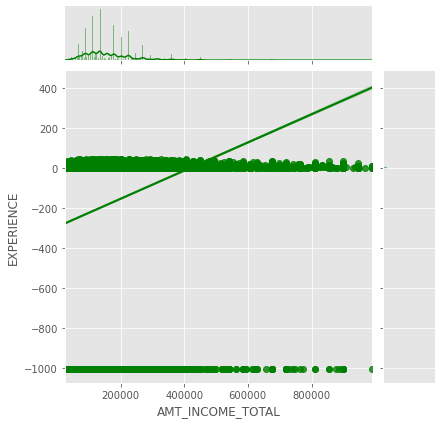

In [216]:
sns.jointplot(data=applications[applications.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y='EXPERIENCE', kind='reg', color='green')
plt.show()

#### Total income vs Amount requested for loan

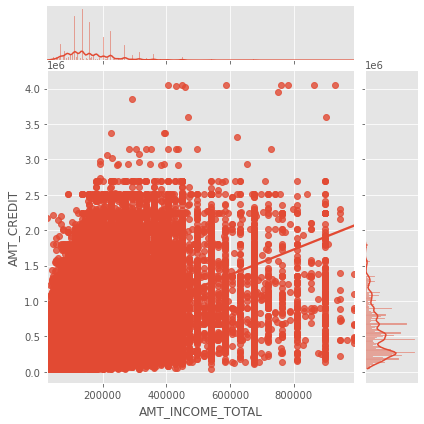

In [212]:
sns.jointplot(data=applications[applications.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y='AMT_CREDIT', kind='reg')
plt.show()

# Multivariate Analysis

#### Family status vs Occupation vs Target

In [218]:
data = pd.pivot_table(data=applications, index='OCCUPATION_TYPE',columns='NAME_FAMILY_STATUS', values='TARGET')
data

NAME_FAMILY_STATUS,Married,Separated,Single,Widow
OCCUPATION_TYPE,,,,
Accountants,0.045846,0.053352,0.058704,0.044521
Cleaning staff,0.097342,0.078652,0.122066,0.067265
Cooking staff,0.101545,0.084135,0.144550,0.059859
Core staff,0.060456,0.057576,0.080491,0.038880
Drivers,0.106101,0.145655,0.147986,0.153153
HR staff,0.056511,0.065217,0.066667,0.200000
High skill tech staff,0.059609,0.061252,0.072008,0.048327
IT staff,0.072674,0.000000,0.060000,0.000000
Laborers,0.101180,0.109462,0.132301,0.069250


In [219]:
applications.TARGET.value_counts(normalize=True)

0    0.919274
1    0.080726
Name: TARGET, dtype: float64

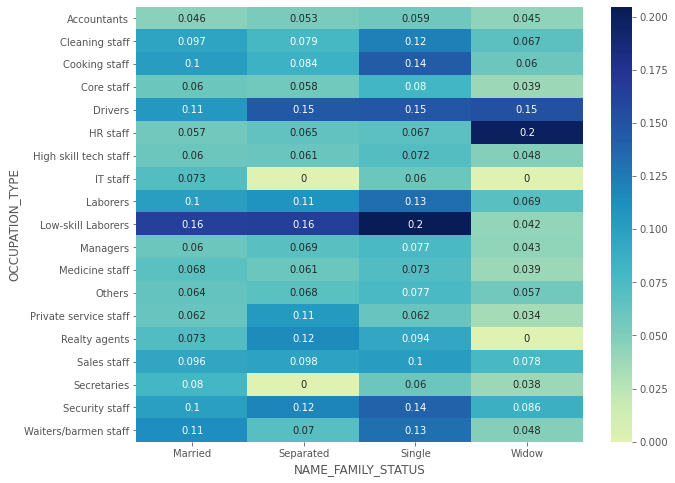

In [222]:
plt.figure(figsize=[10,8])
sns.heatmap(data, annot=True, cmap='YlGnBu', center=0.081)
plt.show()

#### Family status vs Education type vs Target

In [223]:
data_1 = pd.pivot_table(data=applications, index='NAME_EDUCATION_TYPE',columns='NAME_FAMILY_STATUS', values='TARGET')
data_1

NAME_FAMILY_STATUS,Married,Separated,Single,Widow
NAME_EDUCATION_TYPE,,,,
Academic degree,0.017544,0.000000,0.034483,0.000000
Higher education,0.051481,0.057346,0.062049,0.048094
Incomplete higher,0.081425,0.086643,0.094143,0.063584
Lower secondary,0.108170,0.138249,0.132988,0.067961
Secondary / secondary special,0.087434,0.089904,0.113243,0.059666


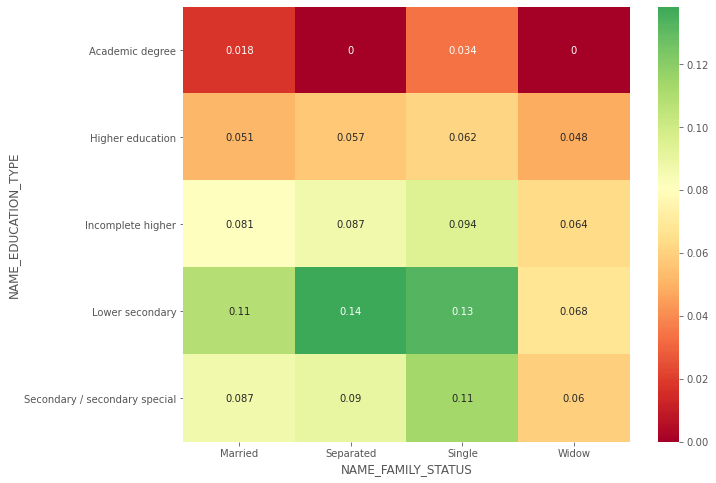

In [226]:
plt.figure(figsize=[10,8])
sns.heatmap(data_1, annot=True, cmap='RdYlGn', center=0.081)
plt.show()

#### Correlation between target and prominent numeric variables

In [229]:
data_3 = applications[['TARGET','AGE','AMT_INCOME_TOTAL','AMT_CREDIT','EXT_SOURCE_AVG','CNT_FAM_MEMBERS','Credit_Bureau_Total']].corr()
data_3

,TARGET,AGE,AMT_INCOME_TOTAL,AMT_CREDIT,EXT_SOURCE_AVG,CNT_FAM_MEMBERS,Credit_Bureau_Total
TARGET,1.000000,-0.078232,-0.020457,-0.030369,-0.222036,0.009298,-0.002985
AGE,-0.078232,1.000000,-0.056616,0.055392,0.279730,-0.278894,0.069799
AMT_INCOME_TOTAL,-0.020457,-0.056616,1.000000,0.342172,0.082098,0.032363,0.065497
AMT_CREDIT,-0.030369,0.055392,0.342172,1.000000,0.143684,0.063160,0.006282
EXT_SOURCE_AVG,-0.222036,0.279730,0.082098,0.143684,1.000000,-0.037363,-0.003752
CNT_FAM_MEMBERS,0.009298,-0.278894,0.032363,0.063160,-0.037363,1.000000,-0.013251
Credit_Bureau_Total,-0.002985,0.069799,0.065497,0.006282,-0.003752,-0.013251,1.000000


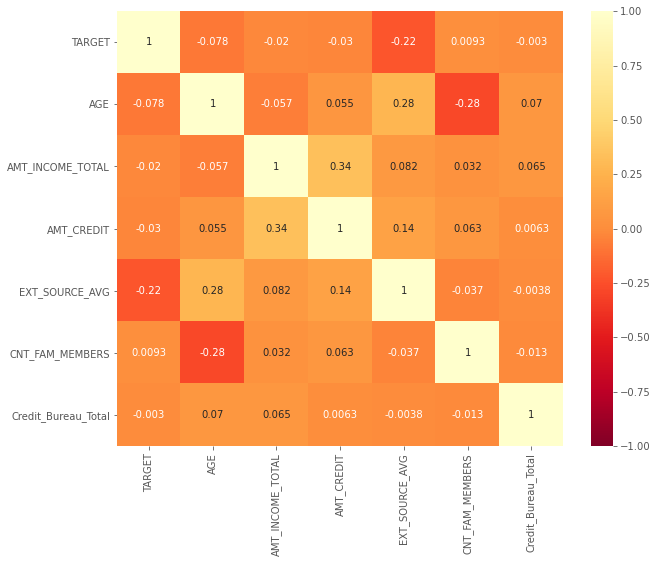

In [234]:
plt.figure(figsize=[10,8])
sns.heatmap(data_3, annot=True, cmap='YlOrRd_r', vmin=-1, vmax=1)
plt.show()

#### Occupation type vs Education type vs Target

In [235]:
data_2 = pd.pivot_table(data=applications, index='OCCUPATION_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET') 
data_2

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
OCCUPATION_TYPE,,,,,
Accountants,0.125000,0.038813,0.056180,0.166667,0.062077
Cleaning staff,0.000000,0.084000,0.102041,0.138889,0.095664
Cooking staff,0.000000,0.088993,0.093220,0.171875,0.105135
Core staff,0.000000,0.045670,0.083902,0.105691,0.078621
Drivers,0.000000,0.083415,0.103870,0.128514,0.117219
HR staff,NaN,0.044818,0.083333,NaN,0.100000
High skill tech staff,0.000000,0.047261,0.070085,0.129032,0.071405
IT staff,NaN,0.049853,0.038462,0.000000,0.113636
Laborers,0.000000,0.076011,0.086326,0.160274,0.109829


<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='OCCUPATION_TYPE'>

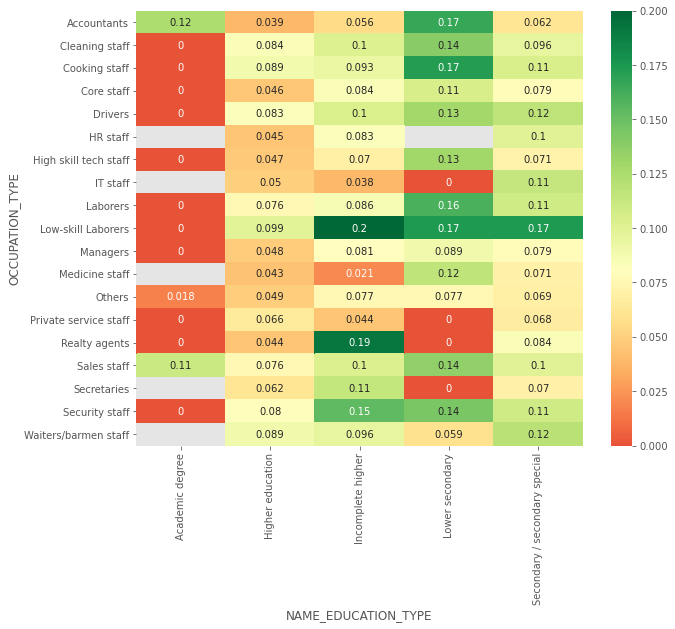

In [237]:
plt.figure(figsize=[10,8])
sns.heatmap(data_2, annot=True, cmap='RdYlGn', center=0.081)

## END ------